In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('homeprices.csv')
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


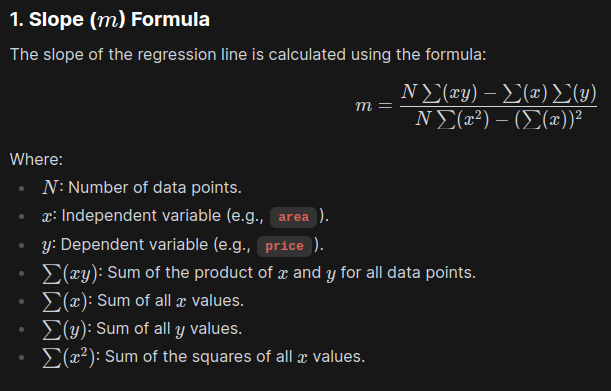

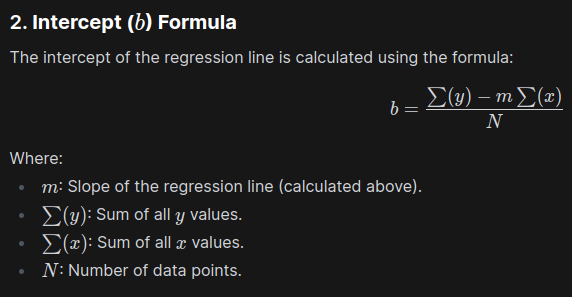

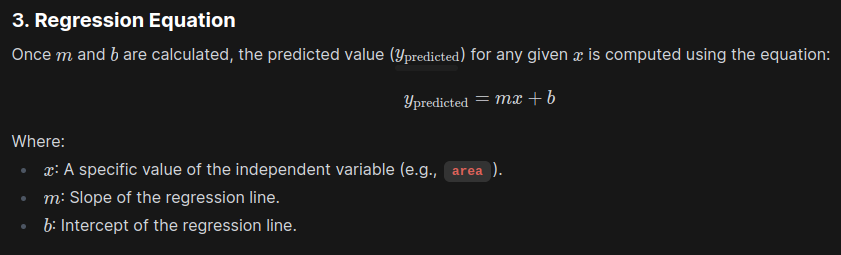

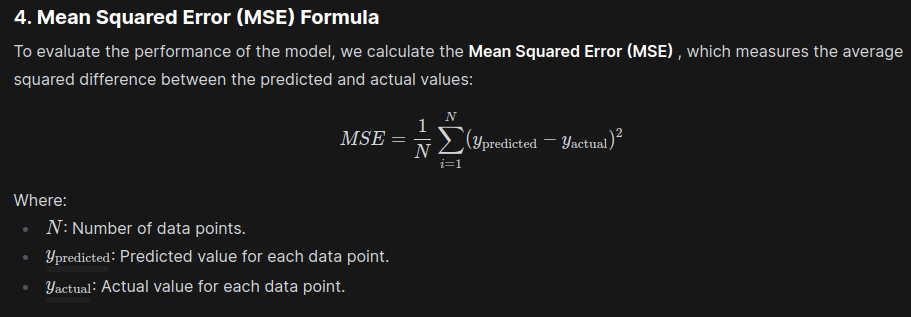

#### **Without ML**

In [5]:
areas = df['area']
prices = df['price']

# Step 2: Calculate slope (m) and intercept (b)
N = len(areas)
sum_x = areas.sum()
sum_y = prices.sum()
sum_xy = (areas * prices).sum()
sum_x2 = (areas ** 2).sum()

# Calculate slope (m)
m = (N * sum_xy - sum_x * sum_y) / (N * sum_x2 - sum_x ** 2)

# Calculate intercept (b)
b = (sum_y - m * sum_x) / N

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

# Step 3: Predict values
predicted_prices = m * areas + b
print("Predicted Prices:", predicted_prices)

# Step 4: Calculate Mean Squared Error (MSE)
mse = ((predicted_prices - prices) ** 2).mean()
print(f"Mean Squared Error (MSE): {mse}")

Slope (m): 135.7876712328767
Intercept (b): 180616.43835616438
Predicted Prices: 0    533664.383562
1    587979.452055
2    615136.986301
3    669452.054795
4    723767.123288
Name: area, dtype: float64
Mean Squared Error (MSE): 186815068.4931503


#### **With ML**

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [36]:
X = df[['area']]
y = df['price']

model = LinearRegression()
model.fit(X, y)

m = model.coef_[0]
b = model.intercept_

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

predicted_prices = model.predict(X)
print("Predicted Prices: ", predicted_prices)

mse = mean_squared_error(y, predicted_prices)
print(f"Mean Squared Error (MSE): {mse}")

Slope (m): 135.78767123287673
Intercept (b): 180616.43835616432
Predicted Prices:  [533664.38356164 587979.45205479 615136.98630137 669452.05479452
 723767.12328767]
Mean Squared Error (MSE): 186815068.4931509


#### **Multiple Variables**

In [23]:
df2 = pd.read_csv('homeprices1.csv')
df2.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [25]:
df2.isnull().sum()

area        0
bedrooms    0
age         0
price       0
dtype: int64

In [24]:
df2.fillna(df2['area'].mean(), inplace=True)

In [33]:
x = df2[['area', 'bedrooms', 'age']]
Y = df2['price']

model = LinearRegression()
model.fit(x, Y)

print("Intercept (b):", model.intercept_)
print("Slope (m):", model.coef_)
print(f"Predicted Prices:", model.predict(x))
print("Mean Squared Error (MSE):", mean_squared_error(Y, model.predict(x)))

Intercept (b): 284983.04076755577
Slope (m): [ 1.32809586e+02 -4.78230649e-01 -5.46313902e+03]
Predicted Prices: [521023.74966519 601462.80097582 610003.25935393 599201.94562035
 772513.88200108 785794.36238364]
Mean Squared Error (MSE): 488220905.2065739
